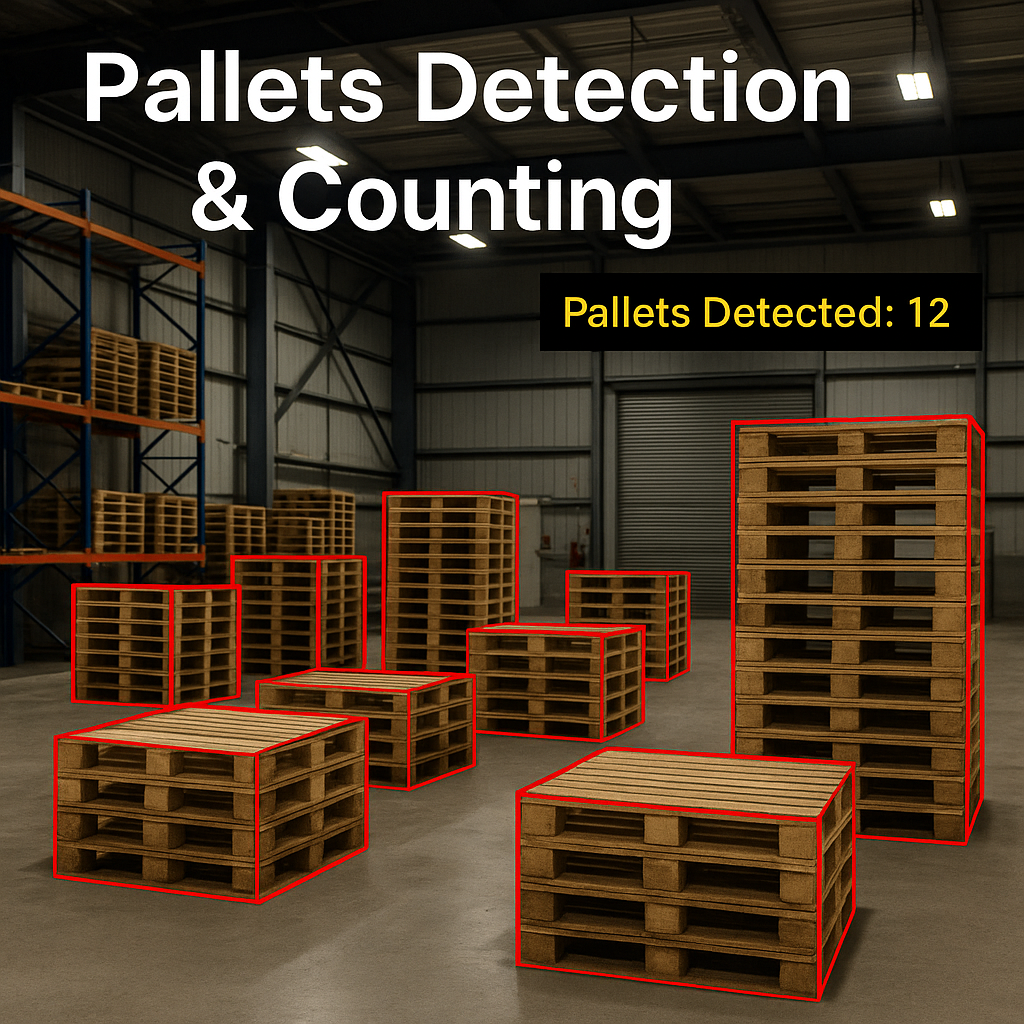

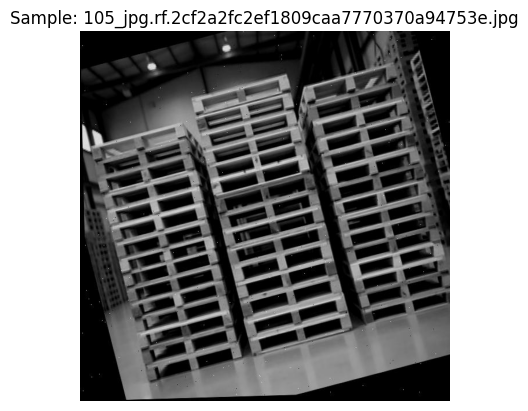

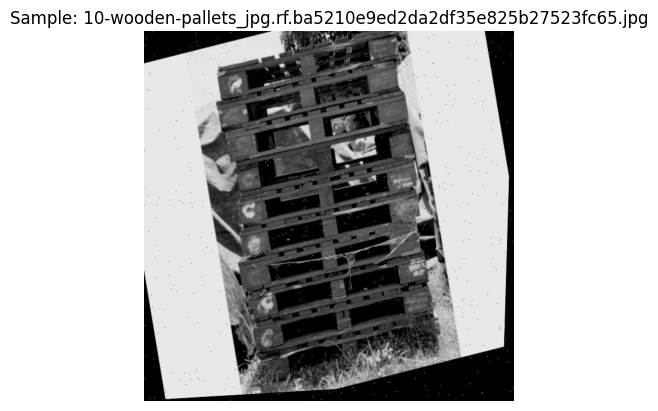

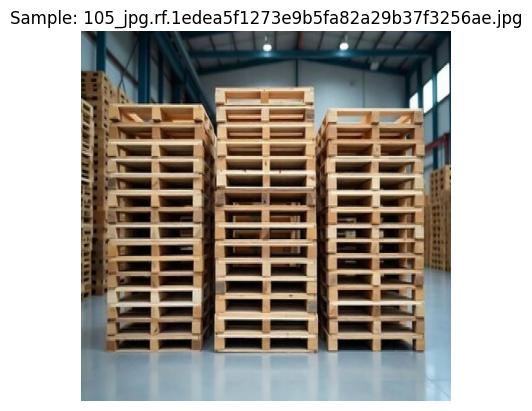

In [4]:
from ultralytics import YOLO
import os
import shutil

# Roboflow Export: Ensure structure is
# ├── datasets/
# │   └── pallet_detection/
# │       ├── train/
# │       │   ├── images/
# │       │   └── labels/
# │       ├── valid/
# │       │   ├── images/
# │       │   └── labels/
# │       └── data.yaml

dataset_path = '/content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)'  # Update path accordingly

# Show sample images
import cv2
import matplotlib.pyplot as plt

img_sample_path = os.path.join(dataset_path, 'train/images')
sample_imgs = os.listdir(img_sample_path)[:3]

for img in sample_imgs:
    image = cv2.imread(os.path.join(img_sample_path, img))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample: {img}')
    plt.axis('off')
    plt.show()

1. ⚙️ Preprocessing Dataset (Roboflow format)
Assumes images and labels are exported in YOLO format from Roboflow.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. 🚀 Training YOLO Models

In [ ]:
# Train YOLO models
model_variants = {
    "YOLOv8n": "yolov8n.pt",
    "YOLOv8m": "yolov8m.pt",
    "YOLOv8l": "yolov8l.pt",
    "YOLOv9c": "yolov9c.pt",     # Custom path if added
    "YOLOv11n": "yolov11n.pt"    # Custom path if added
}

results = {}

for name, weights in model_variants.items():
    print(f"\nTraining: {name}")
    model = YOLO(weights)
    result = model.train(
        data=f"{dataset_path}/data.yaml",
        epochs=70,
        imgsz=640,
        batch=16,
        project="pallet_yolo_results",
        name=name,
        verbose=False
    )
    results[name] = result


Training: YOLOv8n


100%|██████████| 6.25M/6.25M [00:00<00:00, 292MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

100%|██████████| 755k/755k [00:00<00:00, 139MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 341MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.0 MB/s, size: 88.1 KB)


train: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/train/labels... 378 images, 6 backgrounds, 0 corrupt: 100%|██████████| 378/378 [03:38<00:00,  1.73it/s]


train: New cache created: /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 72.4 KB)


val: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/valid/labels... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:39<00:00,  1.13s/it]

val: New cache created: /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/valid/labels.cache


Plotting labels to pallet_yolo_results/YOLOv8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to pallet_yolo_results/YOLOv8n
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      3.25G      2.372      2.766      1.913        289        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         35        597      0.111      0.536      0.196     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      3.27G      1.636      1.648      1.343        325        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         35        597      0.199      0.229     0.0968     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70       3.3G      1.566      1.558      1.276        285        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         35        597      0.374      0.529      0.366      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      3.32G      1.518      1.467       1.25        350        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         35        597      0.315      0.293      0.228      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      3.33G      1.507      1.424      1.228        389        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         35        597      0.318      0.403       0.24      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      3.35G      1.474      1.444      1.228        361        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


                   all         35        597      0.457      0.501      0.466      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      3.37G      1.443      1.413      1.215        265        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         35        597      0.437      0.737       0.46      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      3.38G      1.421      1.341      1.178        335        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         35        597      0.444      0.659      0.536      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70       3.4G      1.448       1.41      1.208        350        640: 100%|██████████| 24/24 [00:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         35        597      0.362      0.769      0.378      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      3.42G      1.407      1.314      1.183        327        640: 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         35        597      0.417      0.719      0.508      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      3.44G      1.381      1.329      1.169        473        640: 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         35        597      0.488      0.786      0.601      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      3.45G      1.367       1.31      1.136        292        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         35        597       0.38      0.603      0.391      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      3.47G       1.35      1.292      1.145        412        640: 100%|██████████| 24/24 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         35        597      0.499      0.822      0.665      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      3.49G      1.325      1.306      1.127        522        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


                   all         35        597       0.36      0.827      0.418      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70       3.5G      1.331      1.266      1.128        382        640: 100%|██████████| 24/24 [00:21<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         35        597      0.492      0.722      0.544      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      3.52G       1.31      1.223      1.126        428        640: 100%|██████████| 24/24 [00:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         35        597      0.479      0.794      0.574      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      3.54G      1.322       1.21      1.116        310        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all         35        597      0.401      0.837       0.49       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      3.55G      1.291      1.196      1.088        225        640: 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         35        597      0.365      0.816      0.402      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      3.57G      1.299      1.221      1.105        509        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         35        597      0.457      0.722      0.496      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      3.59G      1.295      1.184      1.103        287        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         35        597      0.483      0.578      0.567      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      3.61G      1.311      1.213      1.121        430        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


                   all         35        597      0.405      0.858       0.49      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      3.62G      1.291      1.164      1.104        509        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         35        597      0.442      0.735      0.517      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      3.64G       1.29       1.13      1.104        521        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         35        597      0.401      0.727      0.482      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      3.66G      1.246      1.124      1.098        293        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


                   all         35        597      0.371      0.853      0.459      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      3.68G      1.285      1.175      1.109        366        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         35        597      0.496      0.807      0.681      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      3.69G      1.264       1.12      1.089        386        640: 100%|██████████| 24/24 [00:19<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         35        597      0.409      0.747      0.536      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      3.71G      1.265      1.135      1.096        363        640: 100%|██████████| 24/24 [00:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         35        597      0.491      0.668      0.534      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      3.73G      1.238      1.095       1.09        709        640: 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         35        597      0.456      0.817      0.529      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      3.74G      1.295      1.152      1.095        292        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


                   all         35        597      0.487      0.796      0.563      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      3.76G      1.224      1.094      1.081        465        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         35        597      0.447      0.792      0.586      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      3.78G      1.216        1.1      1.064        417        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]


                   all         35        597      0.426      0.807      0.538      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      3.79G      1.255      1.099      1.081        372        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]


                   all         35        597      0.543      0.683      0.624      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      3.81G      1.232      1.077      1.078        353        640: 100%|██████████| 24/24 [00:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         35        597      0.443      0.816       0.57      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      3.83G      1.219      1.078      1.073        361        640: 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         35        597      0.528       0.73       0.57      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      3.85G      1.226      1.113      1.073        448        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         35        597      0.405      0.806      0.521      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      3.86G      1.208      1.038      1.064        443        640: 100%|██████████| 24/24 [00:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         35        597      0.483      0.783      0.547      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      3.88G      1.244      1.048      1.069        401        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]


                   all         35        597      0.375      0.906      0.429      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70       3.9G      1.223       1.02       1.05        732        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


                   all         35        597      0.484      0.735      0.515      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      3.91G      1.216      1.044      1.069        587        640: 100%|██████████| 24/24 [00:19<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         35        597      0.492       0.74      0.574      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      3.93G      1.196      1.024      1.061        313        640: 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         35        597      0.478      0.633      0.559      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      3.95G      1.205     0.9964      1.062        301        640: 100%|██████████| 24/24 [00:19<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         35        597      0.418      0.801      0.461      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      3.96G      1.197     0.9988      1.055        322        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         35        597      0.384       0.75      0.412      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      3.98G      1.165     0.9806      1.051        483        640: 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]


                   all         35        597      0.446      0.789       0.58      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70         4G      1.203      1.001      1.053        574        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         35        597      0.392      0.767      0.468      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      4.02G      1.195      0.987      1.051        317        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         35        597       0.49      0.717      0.583      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      4.03G      1.176     0.9737      1.056        339        640: 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         35        597      0.434      0.752      0.514      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      4.05G       1.19     0.9481      1.049        267        640: 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]


                   all         35        597       0.47      0.697      0.521      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      4.07G      1.184     0.9452      1.042        662        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


                   all         35        597       0.51      0.712      0.613      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      4.08G      1.167     0.9252      1.048        350        640: 100%|██████████| 24/24 [00:19<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         35        597      0.426      0.695      0.501      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70       4.1G      1.163     0.9467      1.039        482        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         35        597      0.429      0.763      0.558      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      4.12G      1.156     0.9538      1.035        495        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         35        597       0.52      0.724      0.583      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      4.14G      1.112     0.9083      1.025        343        640: 100%|██████████| 24/24 [00:21<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         35        597      0.503      0.642      0.546      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      4.15G      1.168      0.925      1.043        400        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         35        597      0.453      0.712      0.496      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      5.15G      1.142      0.906      1.031        440        640: 100%|██████████| 24/24 [00:20<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         35        597      0.516      0.734      0.534       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      5.17G      1.134     0.9066      1.029        486        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         35        597      0.459      0.784      0.548      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      5.18G      1.118     0.8867      1.015        507        640: 100%|██████████| 24/24 [00:20<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         35        597      0.488      0.643      0.544      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70       5.2G      1.132     0.9203      1.033        285        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


                   all         35        597      0.348      0.735      0.451      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      5.22G      1.141     0.8881      1.018        507        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         35        597      0.432      0.739      0.536      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      5.23G      1.128     0.8871       1.03        286        640: 100%|██████████| 24/24 [00:20<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         35        597      0.428      0.772      0.505      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      5.25G      1.115     0.8506      1.029        448        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         35        597      0.397      0.747      0.485      0.313


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      5.27G      1.093     0.9022      1.028        226        640: 100%|██████████| 24/24 [00:11<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35        597       0.45      0.705      0.489      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      5.29G      1.066     0.8516      1.016        293        640: 100%|██████████| 24/24 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         35        597      0.489      0.723      0.566      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70       5.3G      1.046     0.8456      1.008        202        640: 100%|██████████| 24/24 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         35        597      0.462      0.752      0.539      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      5.32G      1.052      0.831      1.008        365        640: 100%|██████████| 24/24 [00:09<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         35        597      0.462      0.715      0.509      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      5.34G      1.052     0.7922      1.005        163        640: 100%|██████████| 24/24 [00:09<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all         35        597      0.476      0.729      0.525      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      5.35G      1.033     0.7957      1.001        332        640: 100%|██████████| 24/24 [00:08<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         35        597      0.493      0.727      0.559      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      5.37G      1.036      0.788      1.002        274        640: 100%|██████████| 24/24 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         35        597      0.479      0.754      0.536      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      5.39G       1.02     0.7894          1        379        640: 100%|██████████| 24/24 [00:09<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         35        597      0.462      0.759      0.526      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70       5.4G      1.034      0.782      1.003        260        640: 100%|██████████| 24/24 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         35        597      0.463      0.771      0.525       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      5.42G      1.022     0.7642      0.998        292        640: 100%|██████████| 24/24 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         35        597      0.457      0.784      0.517      0.339



70 epochs completed in 0.413 hours.
Optimizer stripped from pallet_yolo_results/YOLOv8n/weights/last.pt, 6.3MB
Optimizer stripped from pallet_yolo_results/YOLOv8n/weights/best.pt, 6.3MB

Validating pallet_yolo_results/YOLOv8n/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         35        597      0.496      0.807      0.681      0.429
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to pallet_yolo_results/YOLOv8n

Training: YOLOv8m


100%|██████████| 49.7M/49.7M [00:00<00:00, 302MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv8m, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

train: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/train/labels.cache... 378 images, 6 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.4±2.5 ms, read: 27.6±20.9 MB/s, size: 72.4 KB)


val: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/valid/labels.cache... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


Plotting labels to pallet_yolo_results/YOLOv8m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to pallet_yolo_results/YOLOv8m
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      7.68G       2.35      2.455      1.915        289        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         35        597      0.237      0.685       0.21      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      8.04G      1.597      1.467      1.384        325        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         35        597     0.0171      0.152    0.00904    0.00346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      8.07G      1.547      1.422      1.344        285        640: 100%|██████████| 24/24 [00:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         35        597     0.0253      0.367     0.0171    0.00754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      6.91G      1.545      1.342      1.328        350        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         35        597      0.378      0.536       0.37      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      7.12G      1.491      1.314      1.287        389        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         35        597      0.385       0.68       0.41      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      6.82G      1.506       1.33      1.296        361        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         35        597      0.314      0.419      0.273      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      7.35G      1.476      1.338      1.275        265        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         35        597      0.324      0.578      0.271      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70       7.5G      1.404      1.237      1.237        335        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         35        597      0.324      0.695      0.299      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      7.51G      1.436      1.282      1.246        350        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         35        597      0.451      0.744      0.588      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      6.92G      1.376      1.227      1.229        327        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         35        597        0.4      0.802      0.476      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      7.88G      1.378      1.211      1.231        473        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         35        597      0.516      0.668      0.579      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      7.47G      1.396      1.196       1.21        292        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         35        597      0.432      0.643      0.491      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      7.25G      1.339      1.173      1.197        412        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         35        597      0.362      0.628      0.432      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      7.84G      1.343      1.215      1.199        522        640: 100%|██████████| 24/24 [00:21<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         35        597      0.417       0.73      0.431      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      7.69G      1.344      1.202      1.182        382        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         35        597      0.457      0.717      0.542      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      7.61G      1.311       1.16      1.184        428        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         35        597      0.483      0.637      0.574      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      6.93G      1.305      1.158      1.172        310        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         35        597      0.462      0.803      0.492      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      6.97G      1.282      1.105      1.142        225        640: 100%|██████████| 24/24 [00:21<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         35        597      0.451      0.786      0.566      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70       7.9G      1.296      1.126      1.157        509        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         35        597      0.455      0.776      0.563      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      7.93G      1.285        1.1      1.165        287        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         35        597      0.447       0.82      0.594      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      7.07G      1.309      1.107      1.185        430        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         35        597      0.388      0.711      0.505      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      7.17G      1.276      1.087      1.147        509        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         35        597      0.455      0.809      0.575      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      7.92G      1.288      1.045      1.158        521        640: 100%|██████████| 24/24 [00:20<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         35        597      0.442      0.807      0.627      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      7.62G      1.237      1.037      1.148        293        640: 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         35        597      0.385       0.85      0.467      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      7.05G      1.292      1.081      1.174        366        640: 100%|██████████| 24/24 [00:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         35        597      0.508       0.75      0.656      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      7.26G      1.233      1.026      1.128        386        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         35        597      0.448       0.63      0.525      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      7.59G      1.267      1.068      1.149        363        640: 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         35        597      0.483      0.675       0.61      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      7.34G      1.211      1.024      1.137        709        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         35        597      0.439      0.857      0.522      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      6.84G      1.273      1.051      1.136        292        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         35        597      0.443      0.824      0.541      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      7.54G      1.197     0.9976      1.118        465        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         35        597      0.482      0.834      0.583      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      6.97G       1.19     0.9971      1.108        417        640: 100%|██████████| 24/24 [00:21<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         35        597      0.443       0.81      0.547      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      7.41G      1.239      1.044      1.123        372        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         35        597      0.486      0.698      0.597      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      7.47G      1.202      1.004      1.119        353        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         35        597      0.479      0.712      0.561      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      7.33G      1.214     0.9983      1.118        361        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         35        597      0.519      0.787      0.649      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      6.81G      1.194      1.019      1.113        448        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         35        597      0.495       0.64      0.564      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70       7.5G      1.202     0.9627        1.1        443        640: 100%|██████████| 24/24 [00:20<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]


                   all         35        597      0.466      0.657      0.564      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      7.28G      1.209     0.9679      1.104        401        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         35        597      0.409      0.781      0.577      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      6.82G      1.181     0.9558      1.079        732        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         35        597        0.5      0.717      0.641      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      7.15G       1.19     0.9553      1.107        587        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         35        597      0.519      0.673      0.532       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      6.96G      1.191     0.9485      1.113        313        640: 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         35        597      0.504      0.623      0.575      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      7.22G      1.185     0.9387      1.109        301        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         35        597      0.445      0.829      0.538       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      7.18G      1.176      0.913      1.092        322        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         35        597      0.408      0.759      0.444       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70       7.1G      1.152     0.9077      1.089        483        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         35        597      0.452       0.75      0.557      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      7.59G      1.153     0.9132      1.086        574        640: 100%|██████████| 24/24 [00:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         35        597      0.502      0.529      0.466      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      7.47G      1.172     0.9065      1.092        317        640: 100%|██████████| 24/24 [00:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         35        597      0.501       0.62      0.508      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      7.05G      1.136     0.9084      1.085        339        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         35        597      0.582      0.499      0.587      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      7.76G      1.161     0.8965      1.088        267        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         35        597      0.386      0.755      0.483      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      7.38G      1.147     0.8566       1.08        662        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         35        597      0.444      0.685      0.497      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      7.33G      1.123     0.8442      1.082        350        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         35        597      0.383      0.913      0.421      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      7.16G      1.141     0.8684      1.079        482        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         35        597      0.393      0.802      0.526      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      7.29G      1.122     0.8693      1.069        495        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         35        597      0.502      0.733      0.576       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70         7G      1.083      0.828      1.054        343        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         35        597       0.47      0.634      0.486       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70       8.4G      1.131     0.8423      1.077        400        640: 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         35        597      0.493      0.639       0.58      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      7.59G      1.128     0.8377      1.066        440        640: 100%|██████████| 24/24 [00:21<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         35        597      0.486      0.697       0.59      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      7.15G      1.113     0.8495      1.068        486        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         35        597      0.392      0.673      0.461      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      7.88G       1.08     0.8075      1.046        507        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         35        597       0.44      0.499      0.465      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      6.73G      1.101     0.8406      1.067        285        640: 100%|██████████| 24/24 [00:19<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         35        597      0.383      0.729      0.414      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      7.56G      1.108     0.8126      1.046        507        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         35        597      0.399      0.613      0.448      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      6.83G      1.074     0.7832      1.049        286        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         35        597      0.379      0.742      0.469      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      7.21G      1.088     0.7579      1.058        448        640: 100%|██████████| 24/24 [00:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         35        597      0.471      0.581      0.501      0.343


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      6.79G      1.044     0.7752       1.05        226        640: 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         35        597      0.423      0.746      0.518      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      6.71G      1.024      0.756      1.042        293        640: 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         35        597      0.463      0.746      0.557      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70       6.6G      1.023      0.763      1.039        202        640: 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         35        597       0.45      0.787      0.464      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      6.77G      1.017     0.7408      1.036        365        640: 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         35        597      0.428      0.794      0.456       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      7.17G      1.025     0.7048      1.045        163        640: 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         35        597      0.438      0.866      0.492      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      6.67G     0.9959      0.711      1.037        332        640: 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         35        597      0.446      0.782      0.513      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      6.89G     0.9981     0.6974      1.034        274        640: 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         35        597      0.444      0.732      0.465      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      6.74G     0.9903     0.7035       1.03        379        640: 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         35        597      0.447      0.719      0.461      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      6.69G     0.9979     0.6759       1.03        260        640: 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         35        597      0.464      0.712      0.474      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      6.88G     0.9954     0.6767      1.026        292        640: 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         35        597      0.487      0.675      0.494      0.341



70 epochs completed in 0.465 hours.
Optimizer stripped from pallet_yolo_results/YOLOv8m/weights/last.pt, 52.0MB
Optimizer stripped from pallet_yolo_results/YOLOv8m/weights/best.pt, 52.0MB

Validating pallet_yolo_results/YOLOv8m/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


                   all         35        597      0.519      0.787      0.649      0.429
Speed: 0.5ms preprocess, 10.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to pallet_yolo_results/YOLOv8m

Training: YOLOv8l


100%|██████████| 83.7M/83.7M [00:02<00:00, 42.1MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv8l, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

train: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/train/labels.cache... 378 images, 6 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.9±0.2 ms, read: 28.1±17.3 MB/s, size: 72.4 KB)


val: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/valid/labels.cache... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


Plotting labels to pallet_yolo_results/YOLOv8l/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to pallet_yolo_results/YOLOv8l
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      10.6G      2.371      2.434      1.954        289        640: 100%|██████████| 24/24 [00:27<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         35        597     0.0486      0.425     0.0361     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      10.4G      1.641      1.549      1.414        325        640: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         35        597     0.0326      0.171     0.0171    0.00868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      10.9G      1.663      1.503      1.444        285        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         35        597    0.00924     0.0251    0.00315    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70       9.7G      1.635      1.424      1.394        350        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


                   all         35        597     0.0269      0.137     0.0128    0.00519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      10.2G      1.566      1.387      1.356        389        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         35        597     0.0377      0.338     0.0238     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      9.61G      1.543      1.379       1.36        361        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         35        597     0.0651      0.057     0.0209    0.00672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      9.89G      1.519      1.408       1.32        265        640: 100%|██████████| 24/24 [00:23<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         35        597      0.272      0.668      0.293      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70        10G      1.495      1.319      1.305        335        640: 100%|██████████| 24/24 [00:24<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         35        597      0.215      0.529      0.197     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      10.3G      1.503      1.385      1.309        350        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         35        597      0.332      0.385       0.26      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      9.94G      1.409      1.283      1.255        327        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


                   all         35        597      0.316      0.737      0.292      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      9.85G      1.423      1.269      1.264        473        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         35        597      0.384      0.513      0.466      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70        10G      1.435      1.255      1.232        292        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         35        597      0.407      0.668      0.519      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70        10G      1.382      1.234      1.244        412        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         35        597        0.4      0.704       0.52      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      10.4G      1.378       1.25      1.224        522        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         35        597      0.394      0.751      0.414      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      10.2G      1.365      1.243       1.22        382        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


                   all         35        597      0.478      0.806      0.488      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      10.4G      1.339      1.211      1.216        428        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         35        597      0.425      0.813      0.468      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      9.87G      1.341      1.205      1.195        310        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         35        597      0.509      0.774      0.545      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      9.98G      1.328      1.166      1.183        225        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         35        597      0.508      0.695      0.588      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      10.4G      1.322      1.167      1.186        509        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         35        597       0.38      0.806       0.45      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      9.96G      1.316      1.131      1.186        287        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


                   all         35        597      0.445      0.799       0.53      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      9.99G      1.332      1.162      1.213        430        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         35        597      0.348      0.821      0.482      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      9.78G      1.294      1.125      1.174        509        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         35        597      0.442      0.839      0.514      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      10.7G      1.317      1.093      1.187        521        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         35        597      0.442      0.759      0.534      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      10.4G      1.249      1.083      1.165        293        640: 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         35        597      0.369      0.837      0.388      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      9.84G      1.304      1.146      1.185        366        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         35        597      0.542      0.559      0.633       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      10.2G      1.271      1.107      1.155        386        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         35        597      0.424      0.827      0.544      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      10.4G      1.304      1.128      1.186        363        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         35        597      0.434      0.754      0.565      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      9.88G       1.25       1.08      1.171        709        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         35        597      0.398      0.816      0.409      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      9.78G      1.326      1.128      1.172        292        640: 100%|██████████| 24/24 [00:23<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         35        597      0.453      0.735      0.513      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      10.3G      1.221      1.052      1.144        465        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         35        597      0.495      0.817      0.667      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      9.86G      1.209      1.038      1.128        417        640: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]


                   all         35        597      0.417      0.838      0.529      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70       9.9G      1.256      1.075      1.145        372        640: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         35        597       0.39      0.905      0.489      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      9.97G      1.246      1.067      1.155        353        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         35        597      0.412      0.675      0.528      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      10.3G       1.22      1.058      1.135        361        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         35        597      0.481      0.783      0.627      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      9.86G      1.233      1.063      1.144        448        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         35        597      0.435      0.789      0.584      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      10.3G      1.226      1.006      1.127        443        640: 100%|██████████| 24/24 [00:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         35        597      0.443      0.826      0.525       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      10.1G      1.231      1.023      1.126        401        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         35        597      0.405       0.89      0.556      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      9.76G      1.204     0.9982      1.103        732        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         35        597      0.393      0.878      0.454      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      10.3G      1.213      1.006      1.128        587        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         35        597      0.438      0.749      0.547       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      9.51G       1.21      1.005      1.132        313        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         35        597      0.471       0.68      0.567      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      10.2G      1.202     0.9918       1.13        301        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         35        597       0.47      0.744       0.58      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      10.1G      1.196     0.9677      1.113        322        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         35        597      0.473      0.712      0.545      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      9.87G      1.166      0.965      1.114        483        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         35        597      0.511      0.735      0.631      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      10.6G      1.179     0.9593      1.112        574        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         35        597      0.424      0.729       0.43      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      10.3G      1.181     0.9555      1.109        317        640: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         35        597       0.39      0.709      0.463      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      10.3G      1.153     0.9568      1.109        339        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         35        597      0.398      0.563      0.491       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70        10G      1.177     0.9257      1.104        267        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         35        597      0.375      0.725      0.457      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      10.2G      1.168     0.9069      1.102        662        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         35        597      0.357      0.652      0.483      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      10.3G      1.147     0.8936      1.102        350        640: 100%|██████████| 24/24 [00:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         35        597      0.369      0.841      0.448      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      10.1G      1.161     0.9209      1.102        482        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         35        597      0.388      0.693      0.468      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      10.2G      1.143     0.9074      1.096        495        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         35        597      0.435      0.687      0.541      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      9.97G      1.096     0.8746      1.074        343        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         35        597      0.414        0.7      0.528      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      10.7G      1.154     0.8959      1.105        400        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         35        597      0.404      0.658      0.559      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      10.8G      1.149     0.8802      1.089        440        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         35        597      0.452      0.601      0.524      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      9.72G       1.13      0.885      1.085        486        640: 100%|██████████| 24/24 [00:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         35        597      0.394      0.631      0.508      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      10.1G        1.1     0.8466      1.073        507        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         35        597      0.442      0.633      0.519      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      9.96G       1.12     0.8704      1.088        285        640: 100%|██████████| 24/24 [00:21<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         35        597      0.424      0.645      0.477      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      10.1G      1.119     0.8452      1.065        507        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         35        597      0.408       0.57      0.486       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      9.84G      1.095     0.8409      1.074        286        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         35        597      0.388      0.773      0.495      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      10.3G      1.105     0.7845      1.079        448        640: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         35        597      0.491      0.613      0.555       0.37


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      9.55G      1.078     0.8378      1.075        226        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         35        597      0.427      0.726      0.555      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      9.55G      1.058     0.8119      1.057        293        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         35        597      0.445      0.782      0.552      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      9.44G      1.047     0.8072      1.061        202        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         35        597       0.45      0.714      0.523      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      9.53G      1.054     0.7824      1.061        365        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35        597      0.426       0.74      0.514      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      9.57G      1.049      0.756      1.061        163        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         35        597       0.43      0.702      0.496      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      9.62G      1.028     0.7628      1.056        332        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35        597      0.456      0.678      0.525      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      9.62G      1.028     0.7485       1.05        274        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         35        597      0.433      0.694      0.493      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      9.57G       1.02     0.7446      1.049        379        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         35        597      0.395      0.786      0.492      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      9.45G      1.026     0.7257      1.048        260        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35        597      0.383      0.727      0.502       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      9.67G      1.024     0.7107      1.042        292        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         35        597      0.411      0.731      0.511      0.345



70 epochs completed in 0.528 hours.
Optimizer stripped from pallet_yolo_results/YOLOv8l/weights/last.pt, 87.6MB
Optimizer stripped from pallet_yolo_results/YOLOv8l/weights/best.pt, 87.6MB

Validating pallet_yolo_results/YOLOv8l/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


                   all         35        597      0.496      0.821      0.667      0.419
Speed: 0.2ms preprocess, 16.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to pallet_yolo_results/YOLOv8l

Training: YOLOv9c


100%|██████████| 49.4M/49.4M [00:01<00:00, 47.1MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9c.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv9c, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

train: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/train/labels.cache... 378 images, 6 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.4±1.0 ms, read: 23.5±13.9 MB/s, size: 72.4 KB)


val: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/valid/labels.cache... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


Plotting labels to pallet_yolo_results/YOLOv9c/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to pallet_yolo_results/YOLOv9c
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70        11G       2.39      2.397      2.028        289        640: 100%|██████████| 24/24 [00:25<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         35        597    0.00768      0.132    0.00429    0.00226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70        11G      1.651      1.497      1.436        325        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         35        597          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      11.2G       1.62      1.474      1.421        285        640: 100%|██████████| 24/24 [00:24<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         35        597          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      10.7G      1.617      1.462      1.412        350        640: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         35        597      0.023      0.238     0.0118    0.00531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      10.8G      1.611      1.406        1.4        389        640: 100%|██████████| 24/24 [00:23<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         35        597     0.0721      0.111     0.0207     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      10.6G      1.558      1.372      1.371        361        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         35        597      0.302        0.3      0.229      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      10.7G      1.519      1.438      1.332        265        640: 100%|██████████| 24/24 [00:24<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         35        597      0.264      0.298      0.149     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      11.1G      1.464      1.309      1.297        335        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         35        597      0.472      0.593      0.437       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      10.6G      1.502      1.356      1.329        350        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         35        597      0.137      0.568      0.114     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      10.7G      1.442      1.293      1.289        327        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         35        597      0.389      0.631      0.363      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      10.9G      1.416      1.269      1.278        473        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         35        597      0.461      0.563      0.495      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      10.8G      1.419       1.25       1.24        292        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         35        597      0.453      0.658      0.473      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      10.6G      1.396      1.242      1.272        412        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         35        597      0.446      0.755       0.56        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      10.7G      1.417      1.238      1.253        522        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         35        597       0.35      0.836      0.379      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      10.6G      1.368      1.221      1.232        382        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         35        597      0.501      0.797       0.61      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      10.5G      1.347      1.175      1.236        428        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         35        597      0.498      0.673      0.485      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      10.8G      1.363      1.182      1.222        310        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


                   all         35        597      0.429      0.724       0.44      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      10.8G      1.302       1.15      1.178        225        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         35        597      0.442      0.848      0.514      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      11.2G      1.328      1.166      1.203        509        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         35        597      0.388      0.842      0.441      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      11.1G      1.331       1.12      1.209        287        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


                   all         35        597      0.438      0.767      0.616      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      10.6G      1.342      1.149      1.235        430        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         35        597      0.464      0.685      0.565      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      10.6G       1.31      1.115      1.193        509        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         35        597      0.468      0.779      0.504      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      10.8G      1.326      1.082       1.21        521        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         35        597      0.432      0.742      0.584      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      11.1G      1.272      1.075      1.188        293        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         35        597      0.377      0.876      0.394      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      10.9G      1.324      1.144      1.206        366        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         35        597      0.475      0.782      0.608      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      11.1G      1.293       1.08      1.183        386        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         35        597      0.494       0.68       0.62      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      10.7G      1.336      1.103      1.213        363        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         35        597      0.563      0.609      0.576      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      10.6G      1.259      1.056      1.194        709        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         35        597      0.471      0.777      0.589      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      10.5G      1.343      1.107      1.202        292        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         35        597      0.498      0.772      0.581      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      10.6G      1.233      1.048      1.167        465        640: 100%|██████████| 24/24 [00:24<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         35        597      0.469      0.691      0.522      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      10.7G      1.228      1.031      1.147        417        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         35        597      0.455      0.821      0.539      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      10.6G      1.287       1.07      1.176        372        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         35        597      0.451      0.683      0.609       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      10.7G      1.235      1.058      1.172        353        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         35        597      0.491      0.761      0.628      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      10.9G      1.233      1.055      1.159        361        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         35        597      0.467      0.809      0.585      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      10.5G      1.244      1.035      1.174        448        640: 100%|██████████| 24/24 [00:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         35        597      0.381      0.843       0.51      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70        11G      1.228     0.9944      1.157        443        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         35        597      0.412      0.881      0.484      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      11.1G      1.242     0.9942      1.151        401        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         35        597      0.454      0.781      0.591      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      10.7G      1.211     0.9723      1.125        732        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         35        597      0.426      0.806      0.572       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70        11G      1.239     0.9975      1.157        587        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         35        597      0.492      0.668      0.599      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      10.4G      1.209     0.9984      1.149        313        640: 100%|██████████| 24/24 [00:22<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         35        597       0.45      0.802      0.603      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      10.6G      1.195     0.9832      1.147        301        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         35        597      0.567      0.611      0.676      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      10.8G      1.211     0.9715      1.139        322        640: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         35        597      0.477      0.584      0.501      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      10.7G      1.189     0.9614      1.136        483        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         35        597      0.499      0.786      0.602      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      10.7G      1.191     0.9589      1.126        574        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         35        597      0.457       0.76      0.505      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      10.6G      1.201     0.9489      1.134        317        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         35        597      0.429      0.747      0.538      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      10.9G      1.167     0.9454      1.133        339        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         35        597      0.414      0.682      0.518      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70        11G      1.204     0.9179      1.128        267        640: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         35        597      0.425      0.675      0.491      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70        11G      1.186     0.9178      1.127        662        640: 100%|██████████| 24/24 [00:23<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


                   all         35        597      0.529      0.548      0.561      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      11.2G      1.169     0.8986       1.13        350        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         35        597      0.402      0.777      0.492      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      10.8G      1.171     0.9169      1.121        482        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         35        597      0.542      0.467      0.549      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      10.7G      1.154      0.901      1.112        495        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         35        597      0.557      0.707      0.664      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      10.9G      1.113     0.8632      1.094        343        640: 100%|██████████| 24/24 [00:24<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         35        597      0.507      0.698      0.616       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      11.7G      1.178     0.8928      1.129        400        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         35        597       0.55       0.61      0.615      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      11.1G      1.171     0.8777      1.113        440        640: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         35        597      0.486      0.724       0.59       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      10.7G      1.149     0.8794       1.11        486        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         35        597      0.373      0.719      0.433      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      11.1G      1.117     0.8526      1.095        507        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         35        597      0.455       0.69      0.522      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      10.6G      1.135     0.8638      1.114        285        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all         35        597      0.428        0.7      0.474      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      10.7G      1.139     0.8314       1.09        507        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]


                   all         35        597      0.375      0.764      0.479      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      10.7G      1.112     0.8259      1.096        286        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         35        597      0.397      0.782      0.489      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      10.6G      1.114     0.7871      1.104        448        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         35        597      0.441      0.637      0.533      0.362


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      10.3G      1.088     0.8498      1.102        226        640: 100%|██████████| 24/24 [00:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         35        597      0.413      0.791      0.532      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      10.3G      1.071     0.7987      1.086        293        640: 100%|██████████| 24/24 [00:21<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         35        597      0.395      0.888      0.537      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      10.3G      1.068     0.8093       1.09        202        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35        597      0.429      0.826      0.487      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      10.3G      1.073      0.783      1.094        365        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         35        597      0.456      0.799      0.547      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      10.3G      1.074     0.7386      1.098        163        640: 100%|██████████| 24/24 [00:19<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         35        597      0.469      0.734      0.534      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      10.3G      1.042     0.7543      1.082        332        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         35        597      0.457       0.74      0.536      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      10.3G      1.055     0.7362      1.079        274        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         35        597      0.475       0.72      0.511      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      10.3G      1.041     0.7261      1.073        379        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35        597      0.465       0.73      0.492      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      10.3G      1.042     0.7262      1.075        260        640: 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         35        597      0.467      0.706      0.505      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      10.2G      1.037     0.7092      1.068        292        640: 100%|██████████| 24/24 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35        597      0.456      0.747      0.517      0.351



70 epochs completed in 0.514 hours.
Optimizer stripped from pallet_yolo_results/YOLOv9c/weights/last.pt, 51.6MB
Optimizer stripped from pallet_yolo_results/YOLOv9c/weights/best.pt, 51.6MB

Validating pallet_yolo_results/YOLOv9c/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


                   all         35        597      0.558      0.705      0.664      0.449
Speed: 0.6ms preprocess, 18.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to pallet_yolo_results/YOLOv9c

Training: YOLOv11n


FileNotFoundError: [Errno 2] No such file or directory: 'yolov11n.pt'

3. 📊 Evaluation Code (Accuracy, Precision, Inference Time)

In [ ]:
from ultralytics.utils.benchmarks import benchmark

evaluation_summary = []

for name in model_variants:
    model_path = f"pallet_yolo_results/{name}/weights/best.pt"
    model = YOLO(model_path)

    # Evaluate
    metrics = model.val()
    # Benchmark Inference Time
    speed_result = benchmark(model=model, imgsz=640, half=False, device=0)

    evaluation_summary.append({
        "Model": name,
        "mAP50": round(metrics.box.map50, 4),
        "mAP50-95": round(metrics.box.map, 4),
        "Precision": round(metrics.box.p[0], 4), # Access precision using metrics.box.p[0] assuming you have a single class
        "Recall": round(metrics.box.r[0], 4),   # Access recall using metrics.box.r[0] assuming you have a single class
        "FPS": round(speed_result['FPS'], 2),
        "Inference Time (ms)": round(1000 / speed_result['FPS'], 2)
    })

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 28.7±4.9 MB/s, size: 69.4 KB)


val: Scanning /content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/valid/labels.cache... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all         35        597      0.499      0.807      0.684       0.43
Speed: 0.3ms preprocess, 12.0ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to runs/detect/val36
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1476.7±701.5 MB/s, size: 54.0 KB)


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.06it/s]

                   all          4         17   0.000139     0.0167   7.78e-05   3.08e-05
Speed: 0.4ms preprocess, 41.7ms inference, 0.0ms loss, 4.0ms postprocess per image



PyTorch: starting from 'pallet_yolo_results/YOLOv8n/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 1.9s, saved as 'pallet_yolo_results/YOLOv8n/weights/best.torchscript' (11.9 MB)

Export complete (2.0s)
Results saved to /content/pallet_yolo_results/YOLOv8n/weights
Predict:         yolo predict task=detect model=pallet_yolo_results/YOLOv8n/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=pallet_yolo_results/YOLOv8n/weights/best.torchscript imgsz=640 data=/content/drive/MyDrive/PROJECT/5TH PROJECT-PALLET COUNT/AUGMENTED DATASET/AUGUMENTED DATASET(5X)/data.yaml  
Visualize:       https://netron.app
Loading pallet_yolo_results/YOLOv8n/weights/best.torchscript for TorchScript inference...
Loading pallet_yolo_results/YOLOv8n/weights/best.torchscript for TorchScript inference...
val: Fast image access ✅ (ping: 0.0±0.0 ms, rea

val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-69ebfdf00969>", line 12, in <cell line: 0>
    speed_result = benchmark(model=model, imgsz=640, half=False, device=0)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/utils/benchmarks.py", line 170, in benchmark
    results = exported_model.val(
              ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 630, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py", line 193, in __call__
    model

TypeError: object of type 'NoneType' has no len()

4. 📋 Final Results Summary Table

In [ ]:
import pandas as pd

summary_df = pd.DataFrame(evaluation_summary)
print(summary_df.sort_values(by="mAP50-95", ascending=False))

     Model   mAP50  mAP50-95  Precision  Recall                                                FPS  \
3  YOLOv9c  0.6639    0.4479     0.5602  0.7018  0      7.98
1     24.71
2      3.39
3       Na...   
0  YOLOv8n  0.6837    0.4298     0.4988  0.8068  0      56.60
1     136.73
2      93.48
3      ...   
1  YOLOv8m  0.6495    0.4295     0.5195  0.7873  0     27.90
1     28.85
2     23.20
3       Na...   
2  YOLOv8l  0.6679    0.4199     0.4957  0.8198  0     19.70
1     20.35
2     20.67
3       Na...   

                                 Inference Time (ms)  
3  0      125.31
1       40.47
2      294.99
3   ...  
0  0      17.67
1       7.31
2      10.70
3      ...  
1  0       35.84
1       34.66
2       43.10
3   ...  
2  0       50.76
1       49.14
2       48.38
3   ...  


✅ 2. Updated Training Code for YOLOv8l (Accurate and Efficient)

In [5]:
from ultralytics import YOLO

# Load YOLOv8l model
model = YOLO('yolov8l.pt')  # pre-trained weights

# Train model with updated params
model.train(
    data='/content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/data.yaml',     # update with your actual dataset path
    epochs=100,
    imgsz=640,
    batch=15,
    name='pallet_detect_yolov8l',
    patience=20,                        # early stopping
    optimizer='SGD',                    # better generalization
    device=0,                           # GPU (use 'cpu' if no GPU)
    verbose=True,
    workers=4,
    project='YOLOv8_Pallet_Project',
    exist_ok=True,
    save=True,
    save_period=1,
    val=True,
    augment=True,
    plots=True,
    cache=True,
    seed=42
)


100%|██████████| 83.7M/83.7M [00:00<00:00, 363MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=15, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pallet_detect_yolov8l, nbs=64, nms=False, opset=None, optimize=False, optimizer=S

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.8±0.7 ms, read: 14.0±19.8 MB/s, size: 79.3 KB)


train: Scanning /content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/train/labels... 378 images, 6 backgrounds, 0 corrupt: 100%|██████████| 378/378 [03:30<00:00,  1.80it/s]

train: New cache created: /content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.4GB RAM): 100%|██████████| 378/378 [00:02<00:00, 180.54it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.2±1.4 ms, read: 0.2±0.1 MB/s, size: 74.1 KB)


val: Scanning /content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/valid/labels... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:25<00:00,  1.40it/s]

val: New cache created: /content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 35/35 [00:00<00:00, 170.16it/s]


Plotting labels to YOLOv8_Pallet_Project/pallet_detect_yolov8l/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00046875), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to YOLOv8_Pallet_Project/pallet_detect_yolov8l
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.29G      2.902      2.459      2.393         84        640: 100%|██████████| 26/26 [00:23<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         35        597      0.329      0.328       0.29      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.01G      1.508      1.757      1.376        233        640: 100%|██████████| 26/26 [00:20<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         35        597      0.371       0.74      0.431      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       9.3G      1.359      1.459      1.191         59        640: 100%|██████████| 26/26 [00:20<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         35        597      0.449      0.588      0.563      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.55G      1.435      1.409      1.201        109        640: 100%|██████████| 26/26 [00:20<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         35        597      0.476      0.568      0.487      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.26G      1.327      1.361       1.13        116        640: 100%|██████████| 26/26 [00:20<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35        597      0.596      0.482      0.528      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.39G      1.347      1.186      1.137         74        640: 100%|██████████| 26/26 [00:20<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         35        597      0.447      0.615      0.512      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.83G      1.281      1.183      1.114        169        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         35        597      0.444      0.494      0.491      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.68G      1.278      1.096      1.105        134        640: 100%|██████████| 26/26 [00:21<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         35        597      0.527      0.555      0.589      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.21G      1.244     0.9754      1.102        126        640: 100%|██████████| 26/26 [00:21<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         35        597       0.48      0.541       0.51      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.79G       1.25     0.9821      1.086        133        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         35        597      0.552      0.511      0.532      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.77G      1.208     0.9258      1.072         94        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         35        597      0.503      0.501      0.547      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.04G      1.173     0.9169      1.064         74        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         35        597      0.448      0.581      0.526      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.41G      1.202     0.8663      1.062         67        640: 100%|██████████| 26/26 [00:20<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         35        597      0.483      0.442      0.446      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.94G       1.15       0.86      1.041        122        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         35        597      0.378      0.605      0.391      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.71G      1.187     0.8556      1.054        214        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         35        597      0.573      0.503      0.566      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.48G      1.186     0.8454      1.067        156        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         35        597      0.419      0.678      0.532      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.17G      1.149     0.8021      1.064        112        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         35        597      0.526      0.613      0.554      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.61G      1.132     0.8024      1.038         59        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         35        597      0.422      0.796      0.566      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.62G      1.091     0.7734      1.033        100        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         35        597      0.411      0.725      0.528       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       9.7G      1.103     0.7665      1.036         60        640: 100%|██████████| 26/26 [00:21<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         35        597      0.557       0.43      0.476      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.49G      1.121     0.7756      1.049         71        640: 100%|██████████| 26/26 [00:21<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         35        597      0.517      0.497      0.515      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.57G      1.086     0.7306      1.026         54        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         35        597      0.571      0.472      0.539      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.54G      1.075       0.72      1.019        125        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         35        597       0.46      0.581      0.533      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.56G      1.077     0.7142      1.027        123        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         35        597      0.405       0.64      0.461      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.64G      1.036     0.6912      1.003        128        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         35        597      0.539      0.642      0.557       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.1G      1.058     0.6918      1.007        137        640: 100%|██████████| 26/26 [00:21<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         35        597       0.45      0.687      0.573      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.38G      1.032     0.6846      1.012        119        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         35        597       0.45      0.725      0.552      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.95G      1.002      0.629      1.009        165        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         35        597      0.518      0.677      0.577      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.08G     0.9989     0.6299      1.009        125        640: 100%|██████████| 26/26 [00:20<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         35        597      0.398      0.806      0.471      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.46G      1.006     0.6278     0.9827        126        640: 100%|██████████| 26/26 [00:21<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         35        597      0.453      0.561      0.522      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.26G     0.9643     0.6286     0.9826        116        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         35        597      0.435      0.726      0.594        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.13G      1.007     0.6468      0.999         54        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         35        597      0.518      0.685      0.626      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.24G     0.9783     0.6107     0.9898        168        640: 100%|██████████| 26/26 [00:20<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


                   all         35        597      0.506       0.69      0.579      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       9.9G     0.9653     0.5948     0.9889        127        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         35        597       0.43      0.595      0.535      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.99G      0.929      0.583     0.9835         40        640: 100%|██████████| 26/26 [00:20<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         35        597      0.459      0.635      0.533      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.61G     0.9265     0.5637     0.9701        283        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         35        597      0.484      0.709      0.602      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.45G     0.9369     0.5763     0.9727        209        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         35        597      0.451      0.673      0.526      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.24G     0.9218     0.5897     0.9845        133        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         35        597      0.544      0.479      0.532      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.32G     0.9473     0.5863      0.987        120        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         35        597      0.451        0.7      0.533      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        10G     0.9471     0.5653     0.9702        180        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         35        597      0.468      0.693      0.554      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.12G     0.8992     0.5357     0.9635        101        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         35        597      0.502      0.678      0.598      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.46G     0.9272     0.5347     0.9638        107        640: 100%|██████████| 26/26 [00:20<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         35        597      0.542      0.655      0.552      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.22G     0.8824     0.5398     0.9581         97        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         35        597      0.494      0.581      0.519      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.54G     0.8964     0.5428     0.9644        156        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         35        597      0.437      0.605      0.528      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.48G     0.8839     0.5367     0.9569         37        640: 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         35        597      0.581      0.451      0.548      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.47G     0.8931     0.5369     0.9745         36        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         35        597       0.43      0.697      0.569      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.57G     0.8732     0.5002     0.9471         84        640: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         35        597      0.571      0.584      0.596      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.43G     0.8532     0.5034     0.9495        120        640: 100%|██████████| 26/26 [00:21<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         35        597      0.391      0.742      0.542      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.71G     0.8549     0.5043     0.9469        108        640: 100%|██████████| 26/26 [00:21<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         35        597      0.508      0.549      0.552      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.99G     0.8504      0.502     0.9453        123        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         35        597      0.418       0.67      0.531      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.18G     0.8167     0.4796     0.9363         63        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         35        597      0.503      0.584      0.552      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.2G     0.8152      0.468      0.931         98        640: 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         35        597      0.421      0.593      0.499      0.339
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



52 epochs completed in 0.380 hours.
Optimizer stripped from YOLOv8_Pallet_Project/pallet_detect_yolov8l/weights/last.pt, 87.6MB
Optimizer stripped from YOLOv8_Pallet_Project/pallet_detect_yolov8l/weights/best.pt, 87.6MB

Validating YOLOv8_Pallet_Project/pallet_detect_yolov8l/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


                   all         35        597      0.535       0.66       0.63      0.431
Speed: 0.2ms preprocess, 51.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to YOLOv8_Pallet_Project/pallet_detect_yolov8l


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eec7dbb0f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

✅ 3. Check Results and Accuracy

In [11]:
metrics = model.val()
print(metrics.box.map)  # mAP@.5


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 38.6±5.6 MB/s, size: 68.4 KB)


val: Scanning /content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/valid/labels.cache... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 35/35 [00:00<00:00, 179.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


                   all         35        597      0.535       0.66       0.63      0.431
Speed: 3.9ms preprocess, 84.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to YOLOv8_Pallet_Project/pallet_detect_yolov8l
0.43138974724165163


✅ 4. Optional: Use Confusion Matrix and Plot

In [15]:
# After training
results = model.val(save_txt=True)  # Add save_txt=True to save results
# results.save()  # Remove this line - no longer needed with save_txt=True
# results.print() # Print results (to terminal or Jupyter notebook)
# results.plot()  # Plot results (to a file)
# results.boxes  # Access boxes (to a file)
# results.speed  # Access speed (to a file)
# results.keys()  # Get available keys

# To access specific data, you can delve into the result attributes:
# print(results.box.map)  # Print mAP50-95
# print(results.box.map50) # Print mAP50
# print(results.box.map75) # Print mAP75
# print(results.box.maps)  # Print mAPs across all IoU thresholds

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 35.0±5.0 MB/s, size: 74.1 KB)


val: Scanning /content/drive/MyDrive/Annotataed Dataset(Pallet Detection & Count)/AUGUMENTED DATASET(5X)/valid/labels.cache... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 35/35 [00:00<00:00, 198.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.45s/it]


                   all         35        597      0.535       0.66       0.63      0.431
Speed: 7.6ms preprocess, 86.5ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to YOLOv8_Pallet_Project/pallet_detect_yolov8l
